# Strategic Location for Construction of a new Cricket Stadium in Toronto, Canada

Analysis by: Mohan Raj

## Introduction

  Cricket is a popular sport especially in Asian Countries like India, Pakistan, Sri_Lanka, Bangladesh, etc. As a result of globalization, many of the cricket fans who migrated to Canada are restricted to watching the sport on TV or to fly thousands of kilometers to stadium. Thus, to get the real feel of the sport fans often desire to watch the game in stadium that is nearby to them. To capitalize on this opportunity and to satisfy the fans of cricket in Canada. The Cricket Board decides to build a stadium in the capital city of Toronto with in-house food and beverage selling which is also a major revenue stream for the board. Now, the location of the stadium within the city matters a lot and influences many things. 

## Problem Statement

The Client i.e. the cricket board of Canada wants to find the best location to build the stadium under the following conditions/criterias:
1. The Stadium must be close enough to the target audience of cricket fans: To increase attendance and reach
2. The land cost should be less: To reduce the fixed cost of the stadium operation
3. Location should be surrounded by individuals with high income: Since they are more likely to spend their weekends watching the game in stadium
4. To have less food and beverages like coffee, beer venues nearby: Since the in-house food and beverages is a major revenue stream. Having these venues nearby decreases its profitability


## Data Collection

1. Foursquare API to explore popular venues in and around different neighbourhoods in Toronto. Foursquare is a social networking service available for common smartphones, including the iPhone, BlackBerry and Android-powered phones. To use Foursquare on these devices, download the free app. The app's purpose is to help you discover and share information about businesses and attractions around you.And its API version helps software developers to build apps or explore for R & D purposes

2. United Nations Immigration data. From the official website of UN, the immigration data for canada from other countries is used 

3. Neighbourhood names, alongside their corresponding boroughs and postal codes, scraped from Wikipedia: (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050)

4. The Toronto's census data for its social demographic characteristics will be distilled from Toronto's Neighborhood Profile (https://bit.ly/3airrOJ).

5. Geographical coordinates of each neighbourhood: (https://cocl.us/Geospatial_data)

### Importing and installing required libraries

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
!conda install -c anaconda xlrd --yes
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
!conda install lxml --yes
!conda install scikit-learn==0.20.0  --yes
!conda install -c districtdatalabs yellowbrick  --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1f-h516909a_0 --> anaconda::openssl-1.1.1-h7b6447c_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> an

### Extracting the Immigration data of Canada

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')
df_can.head()


Data downloaded and read into a dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Cleaning the data by dropping unwanted columns and creating a dataframe specific to Indian immigrants for later analysis

In [4]:
years = list(map(int,range(1980, 2014)))
dfi=df_can[df_can['OdName']=='India']
dfi=dfi[years]

### Further filtering of Data, Creating a Total Column to get top 5 immigrant nationalities

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Visualizing the trend of these immigrants into CANADA

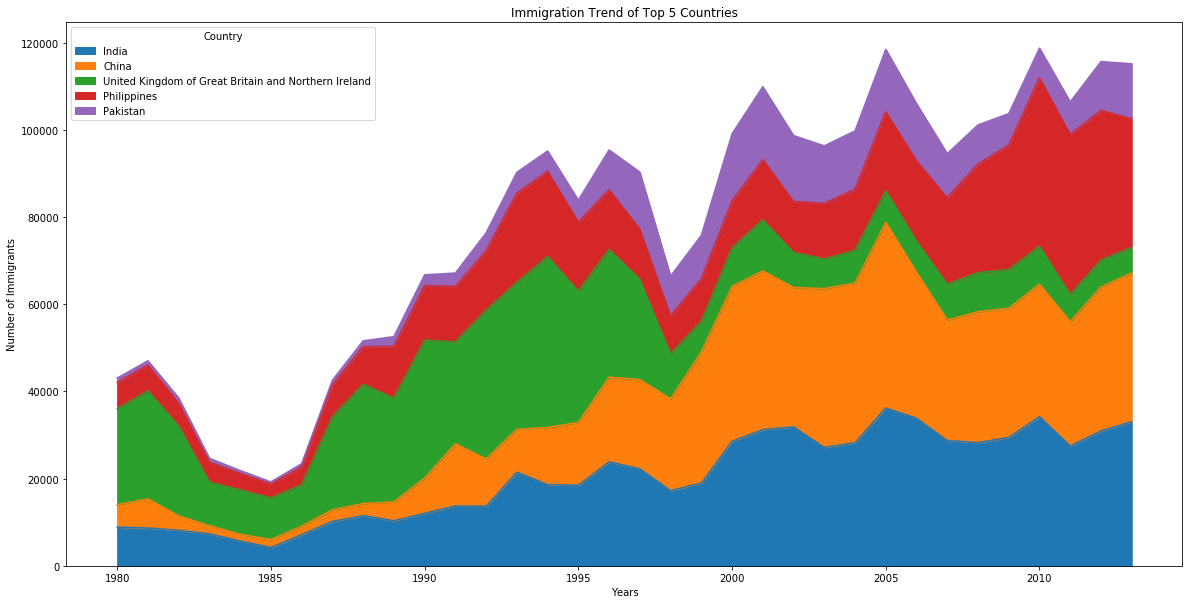

In [6]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked= True,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

We observe that, with the exception of United Kingdom of Britain and Northern Ireland, immigration from the other countries are increasing by year-on-year basis. 
Thus currently the number of immigrants is more

Refining the India Specific immigrant Dataframe, we generalise and predict the future trend of immigrants to Canada. India is choosen because of the consistent and high immigration. And most importantly because of the love of cricket that Indians have

In [7]:
dfi = dfi.rename(columns={' ': 'years'}, index={79: 'Number of Immigrants'})
dfin=pd.DataFrame(dfi.loc['Number of Immigrants'])
dfin.reset_index(inplace=True)
dfin=dfin.rename(columns={'index':'Year'})
dfin

,Year,Number of Immigrants
0,1980,8880
1,1981,8670
2,1982,8147
3,1983,7338
4,1984,5704
5,1985,4211
6,1986,7150
7,1987,10189
8,1988,11522
9,1989,10343


#### Perform Regression analysis using Polynomial regression to the immigrant data to Canada by Indians

Splitting data into training set and testing set

In [8]:
msk = np.random.rand(len(dfin)) < 0.8
train = dfin[msk]
test = dfin[~msk]

Fitting a polynomial regression curve of degree 2

In [9]:
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Number of Immigrants']])

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Number of Immigrants']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)


Obtain the Co-efficients and the Intercept of the fitted regression curve

In [10]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  3.65139354e+04 -8.90910318e+00]]
Intercept:  [-37366766.63733578]


Visualising the fitted line along with the data points

Text(0, 0.5, 'Number of Immigrants')

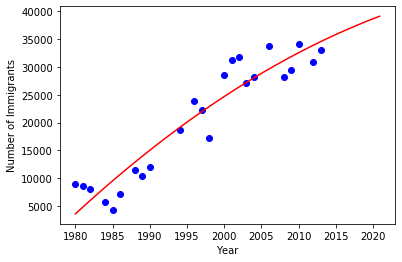

In [11]:
plt.scatter(train.Year, train['Number of Immigrants'],  color='blue')
XX = np.arange(1980, 2021, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

From the plot, we can infer that the number of Indians coming to Canada are increasing steadily. Thus there is a increased chance of audience participation and revenue generation in the future of the stadium

Testing the accuracy of the fitted model

In [12]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 3206.77
Residual sum of squares (MSE): 14704888.56
R2-score: 0.77


Since the regression is only to observe general trend of immigration to Canada, the accuracy of the fitted model is sufficient enough to draw inferences

### Importing census data, processed and obtained from toronto public portal  

Consideration: 
1. South Asian population in Canada refers to individuals from India, Pakistan, Afghanistan, Sri Lanka and Bangladesh. Since all of these are cricket loving countries we fix them as our primary target audience.
2. Tenant Average Rent as an indicator of the land cost of the neighbourhood

In [13]:
dft=pd.read_csv('wbtoronto.csv')
dft.rename(columns={'   South Asian': 'South Asian'}, inplace=True)
dft.drop(['Combined Indicators'],axis=1,inplace=True)
dft.head()

,Neighbourhood,Neighbourhood Id,Total Population,Tenant Average Rent,After-Tax Household Income,South Asian
0,West Humber-Clairville,1.0,33312.0,945.0,59703.0,13920.0
1,Mount Olive-Silverstone-Jamestown,2.0,32954.0,921.0,46986.0,11095.0
2,Thistletown-Beaumond Heights,3.0,10360.0,887.0,57522.0,2555.0
3,Rexdale-Kipling,4.0,10529.0,857.0,51194.0,1420.0
4,Elms-Old Rexdale,5.0,9456.0,966.0,49425.0,840.0


Reading Geospatial Data to obtain Co-ordinates of each neighbourhood

In [14]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Obtaining Data of each neighbourhood and its corresponding postal code from Wikipedia Webpage. These data is merged with the geospatial data, further it is merged with census data to form a complete dataframe named df

In [15]:


df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]

df = df[df.Borough!='Not assigned']
df = pd.merge(df, df_geo, left_on='Postcode', right_on='Postal Code').drop(['Postal Code', 'Postcode', 'Borough'], axis=1)
df = pd.merge(df, dft, on='Neighbourhood', how='left').dropna(how='any', axis=0).reset_index(drop=True)
df.head()

,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Total Population,Tenant Average Rent,After-Tax Household Income,South Asian
0,Victoria Village,43.725882,-79.315572,43.0,17510.0,867.0,43743.0,2985.0
1,Rouge,43.806686,-79.194353,131.0,46496.0,1082.0,72784.0,20175.0
2,Malvern,43.806686,-79.194353,132.0,43794.0,958.0,53425.0,17465.0
3,Highland Creek,43.784535,-79.160497,134.0,12494.0,909.0,87321.0,4515.0
4,Flemingdon Park,43.725900,-79.340923,44.0,21933.0,932.0,43511.0,7650.0


For ease of analysis, the population of South Asians in each neighbourhood is converted to a percentage value and the original values are dropped

In [16]:
df['Percentage of South Asian'] = df['South Asian'] / df['Total Population'] * 100
df.drop(['Total Population', 'South Asian'], axis=1, inplace=True)
df.head()



,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent,After-Tax Household Income,Percentage of South Asian
0,Victoria Village,43.725882,-79.315572,43.0,867.0,43743.0,17.047401
1,Rouge,43.806686,-79.194353,131.0,1082.0,72784.0,43.390829
2,Malvern,43.806686,-79.194353,132.0,958.0,53425.0,39.879892
3,Highland Creek,43.784535,-79.160497,134.0,909.0,87321.0,36.137346
4,Flemingdon Park,43.725900,-79.340923,44.0,932.0,43511.0,34.878950


Getting Co-ordinates of Toronto using geopy

In [17]:
# get location of Toronto using geopy
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
address = 'Toronto'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0

The following pa

### Visualising Toronto and all the neighbourhoods in it using Folium

In [19]:
# Folium mapping
import folium
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Toronto)

map_Toronto

## Using Foursquare API to get popular venues around each of the neighbourhoods

Inputting my personal Foursquare Credentials

In [20]:
CLIENT_ID = 'Q2BJSOVMV25YXYYJGC4LJKP1GX2K4KEQV4DOAQSUKN4UT2AZ' # your Foursquare ID
CLIENT_SECRET = 'A0YVEMDTY3HXHZRUVUGVUACEJM055MZGEIFSO4V0KLAIBUBG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Defining a function to request the venue details around a location

In [21]:
import requests
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
  venues_list = []
  for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)

    #create the API request url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results
        ])
  
  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Category']

  return(nearby_venues)

Calling the above defined function to get data around the neighbourhoods in df Dataframe

In [23]:
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])

toronto_venues

Victoria Village
Rouge
Malvern
Highland Creek
Flemingdon Park
Humewood-Cedarvale
Markland Wood
Guildwood
Morningside
West Hill
The Beaches
Woburn
Hillcrest Village
Bathurst Manor
Thorncliffe Park
Scarborough Village
Henry Farm
Little Portugal
Ionview
Kennedy Park
Bayview Village
Oakridge
Humber Summit
Cliffcrest
Mount Dennis
Weston
Dorset Park
Forest Hill North
Willowdale West
Roncesvalles
Agincourt North
Milliken
New Toronto
Alderwood
Long Branch


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,Victoria Village,43.725882,-79.315572,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant
2,Victoria Village,43.725882,-79.315572,Sultan Of Samosas,43.718823,-79.304350,Indian Restaurant
3,Victoria Village,43.725882,-79.315572,Aga Khan Museum,43.725105,-79.332076,History Museum
4,Victoria Village,43.725882,-79.315572,Jatujak,43.736208,-79.307668,Thai Restaurant
...,...,...,...,...,...,...,...
1809,Long Branch,43.602414,-79.543484,The Beer Store,43.594755,-79.533663,Beer Store
1810,Long Branch,43.602414,-79.543484,Dollarama,43.593866,-79.539825,Discount Store
1811,Long Branch,43.602414,-79.543484,RBC Royal Bank,43.593882,-79.535475,Bank
1812,Long Branch,43.602414,-79.543484,Connorvale Park,43.607201,-79.530702,Park


The obtained result from Foursquare is used to get a count of popular venues near each neighbourhood

In [24]:
toronto_grouped=toronto_venues.groupby('Neighbourhood').count()

#### Plot of Neighbourhood Vs number of Popular venues in it

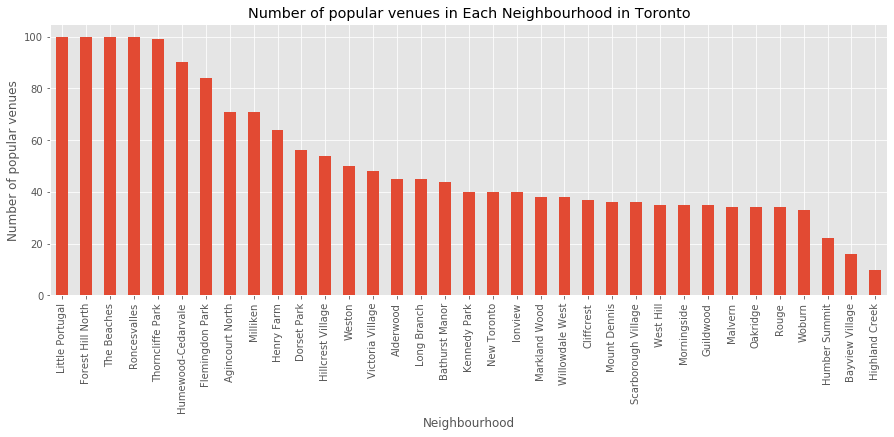

In [25]:
toronto_grouped.sort_values(by='Venue', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped['Venue'].plot(kind='bar', figsize=(15,5))

plt.title('Number of popular venues in Each Neighbourhood in Toronto')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of popular venues')

plt.show()

#### Plot of Neigbourhood against the percentage of South Asians

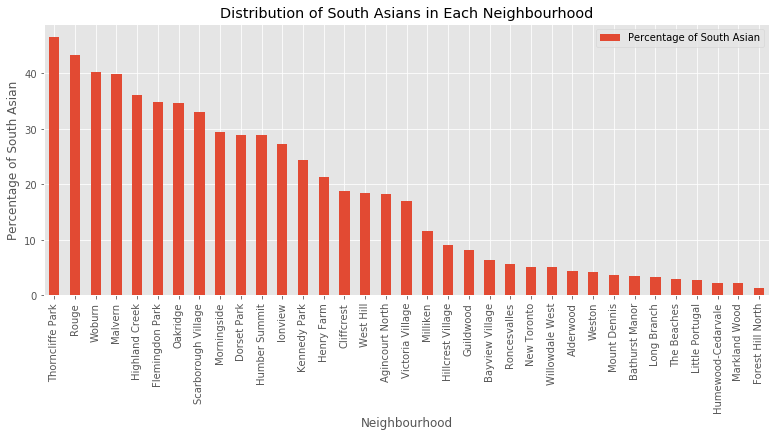

In [26]:
df_ethnic = df[['Neighbourhood', 'Percentage of South Asian']].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by='Percentage of South Asian', ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of South Asians in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of South Asian')

plt.show()

#### Plot of Neighbourhood Vs Average After-Tax Household Income

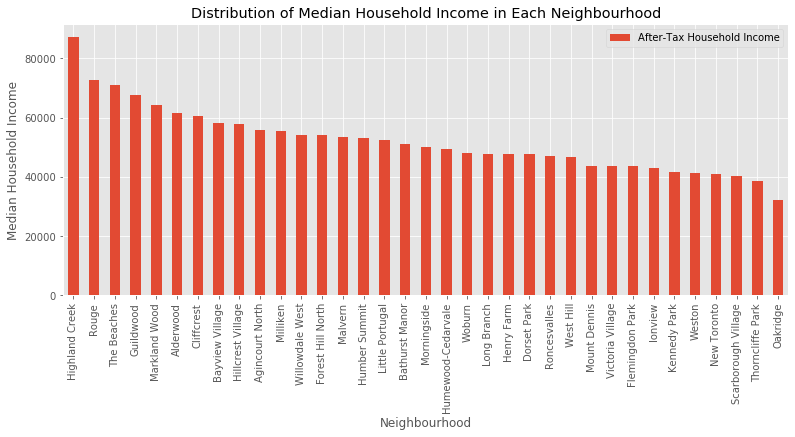

In [28]:
df_income = df[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

Plot of Neighbourhood Vs Tenant Average Rent

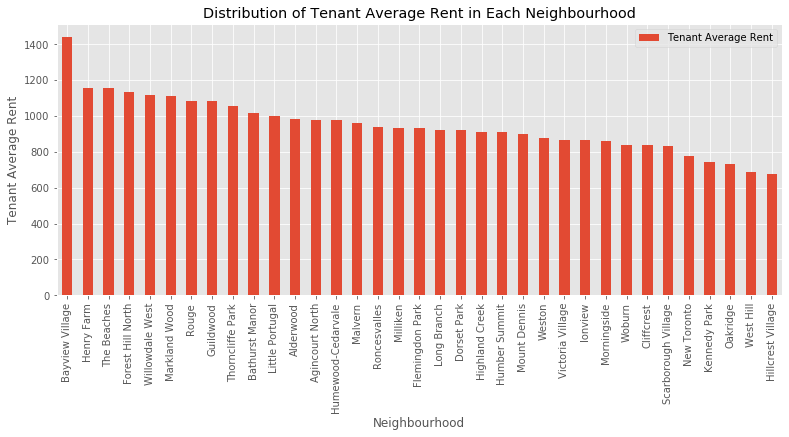

In [29]:
df_rent = df[['Neighbourhood', 'Tenant Average Rent']].set_index('Neighbourhood')

# sort by descending order
df_rent.sort_values(by='Tenant Average Rent', ascending=False, inplace=True)

#plot bar graph
df_rent.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Tenant Average Rent in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Tenant Average Rent')

plt.show()

Data from Foursquare is merged with original data to form df_final datframe for clustering

In [30]:
df_final = pd.merge(df, toronto_grouped, on='Neighbourhood')
df_final.head()

,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent,After-Tax Household Income,Percentage of South Asian,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,43.0,867.0,43743.0,17.047401,48,48,48,48,48,48
1,Rouge,43.806686,-79.194353,131.0,1082.0,72784.0,43.390829,34,34,34,34,34,34
2,Malvern,43.806686,-79.194353,132.0,958.0,53425.0,39.879892,34,34,34,34,34,34
3,Highland Creek,43.784535,-79.160497,134.0,909.0,87321.0,36.137346,10,10,10,10,10,10
4,Flemingdon Park,43.725900,-79.340923,44.0,932.0,43511.0,34.878950,84,84,84,84,84,84


Unwanted Columns are dropped

In [31]:
df_final.drop(['Neighbourhood Id','Neighbourhood Longitude','Neighbourhood Latitude','Venue Latitude','Venue Longitude','Venue Category'],axis=1,inplace=True)

In [32]:
df_final.head()

,Neighbourhood,Latitude,Longitude,Tenant Average Rent,After-Tax Household Income,Percentage of South Asian,Venue
0,Victoria Village,43.725882,-79.315572,867.0,43743.0,17.047401,48
1,Rouge,43.806686,-79.194353,1082.0,72784.0,43.390829,34
2,Malvern,43.806686,-79.194353,958.0,53425.0,39.879892,34
3,Highland Creek,43.784535,-79.160497,909.0,87321.0,36.137346,10
4,Flemingdon Park,43.725900,-79.340923,932.0,43511.0,34.878950,84


## Clustering the Neighbourhoods


Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.


In [33]:
from sklearn.preprocessing import StandardScaler
X = df_final.values[:,3:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  if (warn_on_dtype and dtypes_orig is not None and
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  if (warn_on_dtype and dtypes_orig is not None and


array([[-0.53317041, -0.76318401, -0.05420249, -0.15039727],
       [ 0.882035  ,  1.89181483,  1.7897289 , -0.70035743],
       [ 0.06582351,  0.12196797,  1.54397777, -0.70035743],
       [-0.25671168,  3.22082273,  1.28201495, -1.64314628],
       [-0.10531761, -0.78439402,  1.19393239,  1.26378601],
       [ 0.17114112, -0.25953784, -1.09152496,  1.49948322],
       [ 1.07950553,  1.11591265, -1.09491053, -0.54322596],
       [ 0.87545265,  1.4250119 , -0.67220943, -0.66107456],
       [-0.59899392, -0.18484571,  0.81974391, -0.66107456],
       [-1.7245759 , -0.48343137,  0.0455518 , -0.66107456],
       [ 1.35596426,  1.72478605, -1.03811505,  1.89231191],
       [-0.71089388, -0.38240958,  1.57214621, -0.7396403 ],
       [-1.77723471,  0.51115327, -0.61709889,  0.08529994],
       [ 0.4410175 , -0.09278332, -1.00491438, -0.30752874],
       [ 0.70431153, -1.22925557,  2.01723333,  1.85302904],
       [-0.75697034, -1.08883072,  1.06286568, -0.62179169],
       [ 1.36912896, -0.

In [34]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'Tenant Average Rent', 1:'After-Tax Household Income', 2:'Percentage of South Asian', 3:'Number of Popular Venues'}, inplace=True)
df_normalized.head()

,Tenant Average Rent,After-Tax Household Income,Percentage of South Asian,Number of Popular Venues
0,-0.533170,-0.763184,-0.054202,-0.150397
1,0.882035,1.891815,1.789729,-0.700357
2,0.065824,0.121968,1.543978,-0.700357
3,-0.256712,3.220823,1.282015,-1.643146
4,-0.105318,-0.784394,1.193932,1.263786



### Finding the optimal number of clusters, k



So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function effective_n_jobs is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function effective_n_jobs is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function effective_n_jobs is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly

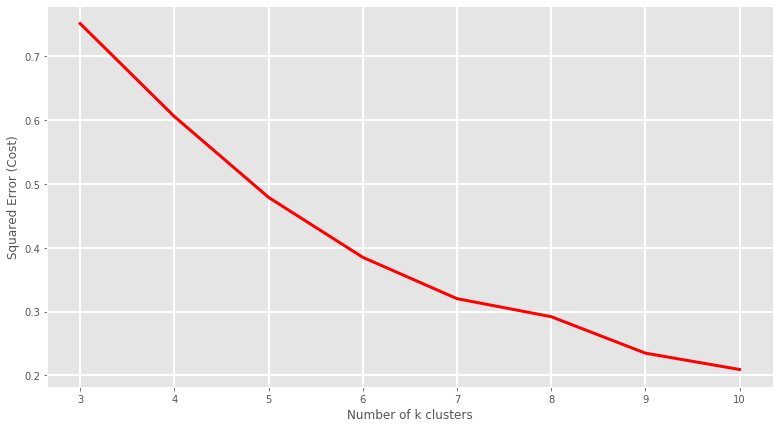

In [35]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

#### Using Elbow Visualizer to get the right K Value

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaf37eb198>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


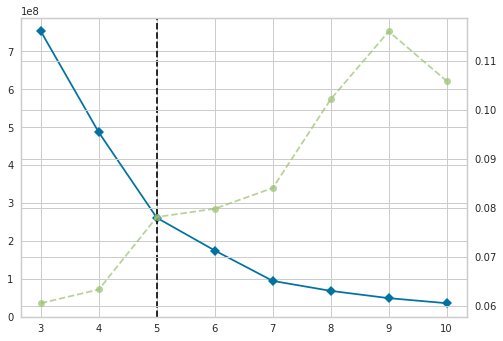

In [36]:

import warnings; warnings.simplefilter('ignore')
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer



## K=5

From the analysis we find that using 5 clusters is essential to get optimum accuracy for the data 

Performing K-Means Clustering to cluster the neighbourhoods

In [37]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 0, 1, 3, 4, 4, 2, 2], dtype=int32)

Merging the cluster data i.e. the label values with each neighbourhood in df Dataframe

In [38]:
df_clustered = pd.merge(df, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)

## Visualizing the Clusters of neighbourhoods in the map

Each coloured point represents one of the cluster of neighbourhoods

Folium is used to generate interactive map with the obtained data

In [39]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=10)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
       
map_clusters

We See different clusters been formed out of all the neighbourhoods in toronto

### Examining Each Cluster to check for its constituents

#### 0th Cluster

In [40]:
df_clustered.loc[df_clustered['Cluster Label'] == 0]


,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
1,0,Rouge,43.806686,-79.194353,131.0,1082.0,72784.0,43.390829,0.882035,1.891815,1.789729,-0.700357
3,0,Highland Creek,43.784535,-79.160497,134.0,909.0,87321.0,36.137346,-0.256712,3.220823,1.282015,-1.643146


#### 1st Cluster

In [41]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
4,1,Flemingdon Park,43.725900,-79.340923,44.0,932.0,43511.0,34.878950,-0.105318,-0.784394,1.193932,1.263786
14,1,Thorncliffe Park,43.705369,-79.349372,55.0,1055.0,38645.0,46.641084,0.704312,-1.229256,2.017233,1.853029
16,1,Henry Farm,43.778517,-79.346556,53.0,1156.0,47659.0,21.401768,1.369129,-0.405174,0.250585,0.478129


#### 2nd Cluster

In [42]:
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
0,2,Victoria Village,43.725882,-79.315572,43.0,867.0,43743.0,17.047401,-0.533170,-0.763184,-0.054202,-0.150397
2,2,Malvern,43.806686,-79.194353,132.0,958.0,53425.0,39.879892,0.065824,0.121968,1.543978,-0.700357
8,2,Morningside,43.763573,-79.188711,135.0,857.0,50069.0,29.533085,-0.598994,-0.184846,0.819744,-0.661075
9,2,West Hill,43.763573,-79.188711,136.0,686.0,46803.0,18.472547,-1.724576,-0.483431,0.045552,-0.661075
11,2,Woburn,43.770992,-79.216917,137.0,840.0,47908.0,40.282322,-0.710894,-0.382410,1.572146,-0.739640
12,2,Hillcrest Village,43.803762,-79.363452,48.0,678.0,57682.0,9.005551,-1.777235,0.511153,-0.617099,0.085300
15,2,Scarborough Village,43.744734,-79.239476,139.0,833.0,40181.0,33.006458,-0.756970,-1.088831,1.062866,-0.621792
18,2,Ionview,43.727929,-79.262029,125.0,863.0,42971.0,27.344036,-0.559500,-0.833762,0.666520,-0.464660
19,2,Kennedy Park,43.727929,-79.262029,124.0,742.0,41776.0,24.324009,-1.355964,-0.943012,0.455130,-0.464660
21,2,Oakridge,43.711112,-79.284577,121.0,730.0,32079.0,34.669556,-1.434952,-1.829535,1.179276,-0.700357


#### 3rd Cluster

In [43]:
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
5,3,Humewood-Cedarvale,43.693781,-79.428191,106.0,974.0,49252.0,2.227637,0.171141,-0.259538,-1.091525,1.499483
10,3,The Beaches,43.676357,-79.293031,63.0,1154.0,70957.0,2.990680,1.355964,1.724786,-1.038115,1.892312
17,3,Little Portugal,43.647927,-79.419750,84.0,997.0,52519.0,2.860081,0.322535,0.039139,-1.047256,1.892312
27,3,Forest Hill North,43.696948,-79.411307,102.0,1132.0,53978.0,1.327503,1.211153,0.172525,-1.154531,1.892312
29,3,Roncesvalles,43.648960,-79.456325,86.0,939.0,46883.0,5.576332,-0.059241,-0.476118,-0.857130,1.892312
30,3,Agincourt North,43.815252,-79.284577,129.0,976.0,55893.0,18.256449,0.184306,0.347599,0.030426,0.753109
31,3,Milliken,43.815252,-79.284577,130.0,934.0,55464.0,11.591149,-0.092153,0.308378,-0.436118,0.753109


#### 4th Cluster

In [44]:
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
6,4,Markland Wood,43.643515,-79.577201,12.0,1112.0,64297.0,2.179269,1.079506,1.115913,-1.094911,-0.543226
7,4,Guildwood,43.763573,-79.188711,140.0,1081.0,67678.0,8.218211,0.875453,1.425012,-0.672209,-0.661075
13,4,Bathurst Manor,43.754328,-79.442259,34.0,1015.0,51076.0,3.465003,0.441018,-0.092783,-1.004914,-0.307529
20,4,Bayview Village,43.786947,-79.385975,52.0,1441.0,58028.0,6.356328,3.245099,0.542785,-0.802534,-1.407449
28,4,Willowdale West,43.782736,-79.442259,37.0,1117.0,54226.0,5.077940,1.112417,0.195197,-0.892015,-0.543226
33,4,Alderwood,43.602414,-79.543484,20.0,984.0,61402.0,4.479841,0.236965,0.851245,-0.933880,-0.268246


## Overall view of all the clusters

In [45]:
df_clustered.groupby('Cluster Label').mean()

,Latitude,Longitude,Neighbourhood Id,Tenant Average Rent_x,After-Tax Household Income_x,Percentage of South Asian_x,Tenant Average Rent_y,After-Tax Household Income_y,Percentage of South Asian_y,Number of Popular Venues
Cluster Label,,,,,,,,,,
0,43.795611,-79.177425,132.500000,995.500000,80052.500000,39.764088,0.312662,2.556319,1.535872,-1.171752
1,43.736595,-79.345617,50.666667,1047.666667,43271.666667,34.307267,0.656041,-0.806274,1.153917,1.198315
2,43.728368,-79.331387,98.529412,834.705882,46565.176471,21.570911,-0.745742,-0.505174,0.262425,-0.476214
3,43.713497,-79.368251,100.000000,1015.142857,54992.285714,6.404261,0.441958,0.265253,-0.799178,1.510707
4,43.722252,-79.429982,49.166667,1125.000000,59451.166667,4.962765,1.165076,0.672895,-0.900077,-0.621792


### We observe that the 0th Cluster has:
1. The highest number of South Asian population -> More Audience
2. Least number of Popular Venues -> Less Competition, hence more sales and profit
3. Highest After-Tax Household income -> People who can pay more
4. Second Least Tenant Average Rent -> Low Land Procurement Cost, thus reduced fixed operation costs

### Thus, for the reasons mentioned above constructing a Cricket stadium in the neighbourhoods belonging to Cluster 0 namely Rouge and Highland Creek is more profitable, attracts more audience and closer to the fan groups 

#### Contact Details: 
Name: Mohan Raj



Email Id: mr.mohanraj.me@gmail.com


Website: https://mohanr.site123.me

### This project is part of the IBM Data Science Certification Program. I sincerely thank IBM, Coursera, all the course instructors and fellow students for giving me such a wonderful experience of learning. 